## Predições

In [1]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Bibliotecas Auxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [2]:
# Diretórios 
model_path = '../models/'
data_path = '../data/processed/'

In [3]:
# Carregando os dados
test_images = np.load(data_path+"test_images.npy")
test_labels = np.load(data_path+"test_labels.npy")

In [4]:
# Normalizando os dados
test_images = test_images / 255.0

In [5]:
# Carregando o modelo
model_name = 'keras01'
model = keras.models.load_model(model_path+ f'{model_name}')

In [6]:
# Predições 
predictions = model.predict(test_images)

In [7]:
# Predição da primeira imagem
# Retorna as probabilidades de cada classe 
predictions[0]

array([1.0784191e-08, 1.1459313e-10, 9.2742795e-08, 7.0038026e-05,
       2.2826008e-11, 4.9646803e-10, 5.9915885e-13, 9.9992740e-01,
       1.3365729e-09, 2.3755008e-06], dtype=float32)

In [8]:
# Maior probabilidade
np.argmax(predictions[0])

7

In [9]:
# Imagem real
test_labels[0]

7

In [10]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label,
                                color=color))

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

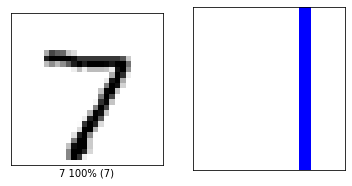

In [11]:
# Imagem, label e predição.
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

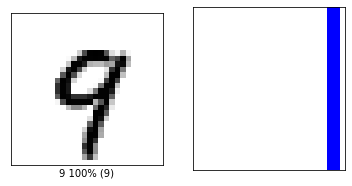

In [12]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

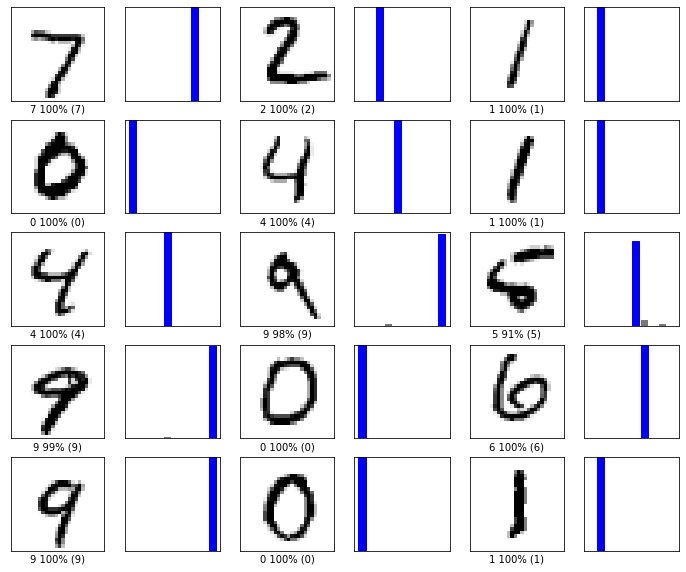

In [13]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()